In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Import data into tensorflow dataset object
Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [62]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS =50

In [63]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [64]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [65]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 1 0 1 1 1 0 0 0 0 0 2 0 1 0 0 2 0 0 0 1 0 1 0 1 1 1 1 1]


In [66]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[152. 150. 151.]
  [158. 156. 157.]
  [159. 157. 160.]
  ...
  [134. 127. 135.]
  [133. 126. 134.]
  [134. 127. 135.]]

 [[152. 150. 151.]
  [157. 155. 156.]
  [158. 156. 159.]
  ...
  [133. 126. 134.]
  [134. 127. 135.]
  [136. 129. 137.]]

 [[152. 150. 153.]
  [156. 154. 157.]
  [157. 155. 158.]
  ...
  [134. 127. 135.]
  [135. 128. 136.]
  [137. 130. 138.]]

 ...

 [[148. 138. 136.]
  [153. 143. 141.]
  [156. 146. 144.]
  ...
  [143. 135. 133.]
  [141. 133. 131.]
  [131. 123. 121.]]

 [[149. 139. 137.]
  [155. 145. 143.]
  [159. 149. 147.]
  ...
  [133. 125. 122.]
  [139. 131. 128.]
  [131. 123. 120.]]

 [[150. 140. 138.]
  [156. 146. 144.]
  [160. 150. 148.]
  ...
  [127. 119. 116.]
  [138. 130. 127.]
  [134. 126. 123.]]]


In [67]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


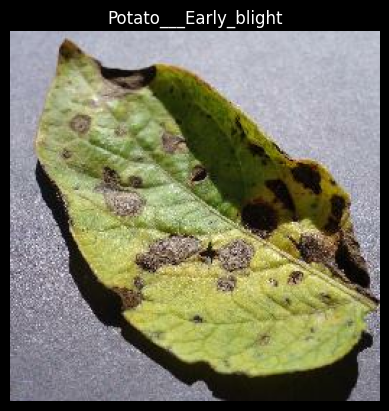

In [68]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")
    plt.show()

## everytime we run the above cell the picture changes because of the batch changes 

to get all images in a batch 


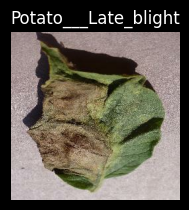

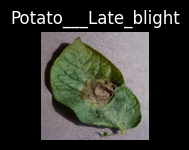

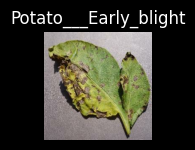

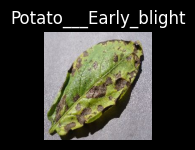

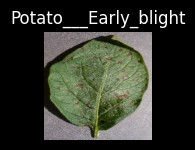

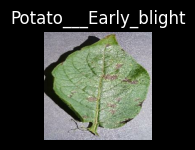

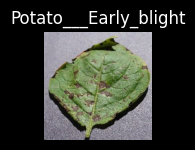

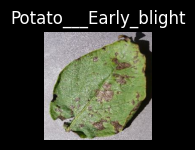

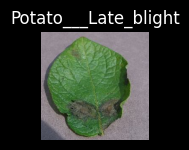

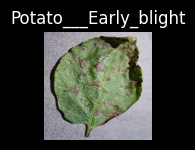

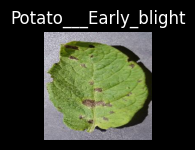

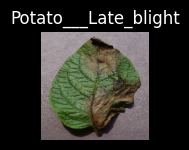

In [69]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        plt.show()

In [70]:
len(dataset)

68

# 80% TO TRAINING AND 10% TO VALIDATION AND 10% TO TEST

In [71]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [72]:
train_ds = dataset.take(54)
len(train_ds)

54

# 80% data is moved to testing

In [73]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [74]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [75]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [76]:
test_ds= test_ds.skip(6)
len(test_ds)

8

# 10% is moved to validation data and 10% is moved to  test data

# dividing data with python function

In [77]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [78]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [79]:
len(train_ds), len(val_ds), len(test_ds)

(54, 6, 8)

In [80]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [81]:
from tensorflow.keras import layers

In [82]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [83]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# convoloutional neural networks

In [90]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/opt/anaconda3/envs/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [93]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 615ms/step - accuracy: 0.4616 - loss: 0.9705 - val_accuracy: 0.6823 - val_loss: 0.8767
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 646ms/step - accuracy: 0.7120 - loss: 0.7287 - val_accuracy: 0.7760 - val_loss: 0.5222
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 673ms/step - accuracy: 0.7902 - loss: 0.4527 - val_accuracy: 0.8542 - val_loss: 0.3416
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 693ms/step - accuracy: 0.8800 - loss: 0.3222 - val_accuracy: 0.8802 - val_loss: 0.3730
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 705ms/step - accuracy: 0.8847 - loss: 0.3023 - val_accuracy: 0.8854 - val_loss: 0.2297
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 723ms/step - accuracy: 0.9037 - loss: 0.2279 - val_accuracy: 0.9271 - val_loss: 0.1879
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 759ms/step - accuracy: 0.9290 - loss: 0.1964 - val_accuracy: 0.9323 - val_loss: 0.1649
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 833ms/step - accuracy: 0.9204 - loss: 0.2031 - val_accu

In [105]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9603 - loss: 0.1157


In [122]:
print(scores)

[0.11486698687076569, 0.953125]


# keras.src.callbacks.history.History    we can explore more from here

In [123]:
history

In [124]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [126]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [125]:
history.history

{'accuracy': [0.5017361044883728,
  0.7291666865348816,
  0.8171296119689941,
  0.8657407164573669,
  0.890625,
  0.9027777910232544,
  0.9230324029922485,
  0.9108796119689941,
  0.9317129850387573,
  0.9265046119689941,
  0.9380787014961243,
  0.9409722089767456,
  0.9398148059844971,
  0.953125,
  0.9502314925193787,
  0.9600694179534912,
  0.9675925970077515,
  0.9629629850387573,
  0.9710648059844971,
  0.9768518805503845,
  0.9768518805503845,
  0.9756944179534912,
  0.9866898059844971,
  0.9861111044883728,
  0.9832175970077515,
  0.9855324029922485,
  0.9832175970077515,
  0.9664351940155029,
  0.9803240895271301,
  0.9826388955116272,
  0.9918981194496155,
  0.9913194179534912,
  0.9809027910232544,
  0.9814814925193787,
  0.9890046119689941,
  0.9861111044883728,
  0.9918981194496155,
  0.9918981194496155,
  0.9901620149612427,
  0.9913194179534912,
  0.9884259104728699,
  0.9895833134651184,
  0.9861111044883728,
  0.9924768805503845,
  0.9901620149612427,
  0.99363428354263

In [128]:
print(history.history['accuracy'])

[0.5017361044883728, 0.7291666865348816, 0.8171296119689941, 0.8657407164573669, 0.890625, 0.9027777910232544, 0.9230324029922485, 0.9108796119689941, 0.9317129850387573, 0.9265046119689941, 0.9380787014961243, 0.9409722089767456, 0.9398148059844971, 0.953125, 0.9502314925193787, 0.9600694179534912, 0.9675925970077515, 0.9629629850387573, 0.9710648059844971, 0.9768518805503845, 0.9768518805503845, 0.9756944179534912, 0.9866898059844971, 0.9861111044883728, 0.9832175970077515, 0.9855324029922485, 0.9832175970077515, 0.9664351940155029, 0.9803240895271301, 0.9826388955116272, 0.9918981194496155, 0.9913194179534912, 0.9809027910232544, 0.9814814925193787, 0.9890046119689941, 0.9861111044883728, 0.9918981194496155, 0.9918981194496155, 0.9901620149612427, 0.9913194179534912, 0.9884259104728699, 0.9895833134651184, 0.9861111044883728, 0.9924768805503845, 0.9901620149612427, 0.9936342835426331, 0.9832175970077515, 0.9884259104728699, 0.9924768805503845, 0.9878472089767456]


In [129]:
len(history.history['accuracy'])

50

In [130]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

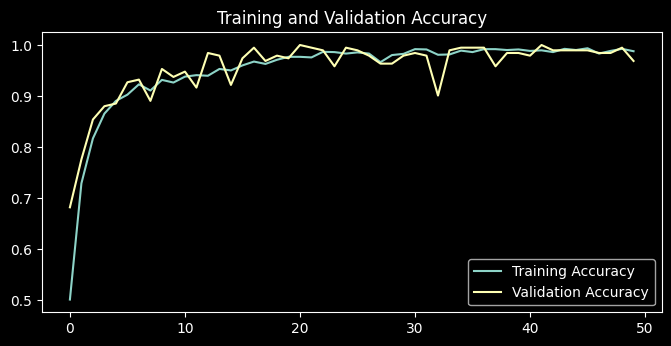

In [133]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

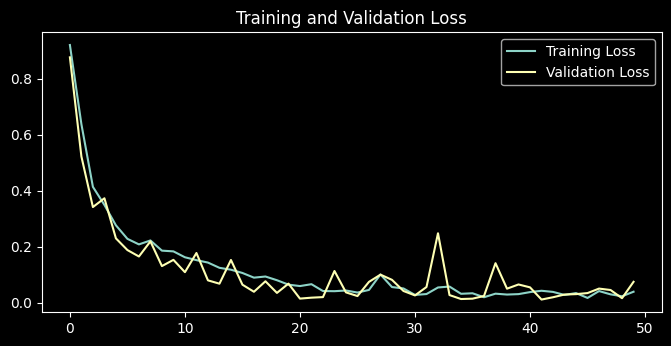

In [132]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# its a tensor initially

In [135]:
for image_batch, labels_batch in test_ds.take(1):
    print(image_batch[0])

tf.Tensor(
[[[123. 111. 115.]
  [112. 100. 104.]
  [119. 107. 111.]
  ...
  [137. 123. 122.]
  [136. 122. 121.]
  [142. 128. 127.]]

 [[125. 113. 117.]
  [125. 113. 117.]
  [141. 129. 133.]
  ...
  [130. 116. 115.]
  [156. 142. 141.]
  [132. 118. 117.]]

 [[123. 111. 115.]
  [121. 109. 113.]
  [127. 115. 119.]
  ...
  [143. 129. 128.]
  [147. 133. 132.]
  [164. 150. 149.]]

 ...

 [[179. 170. 175.]
  [177. 168. 173.]
  [175. 166. 171.]
  ...
  [177. 167. 166.]
  [180. 170. 169.]
  [185. 175. 174.]]

 [[169. 160. 165.]
  [171. 162. 167.]
  [173. 164. 169.]
  ...
  [182. 172. 171.]
  [184. 174. 173.]
  [187. 177. 176.]]

 [[168. 159. 164.]
  [171. 162. 167.]
  [173. 164. 169.]
  ...
  [185. 175. 174.]
  [185. 175. 174.]
  [187. 177. 176.]]], shape=(256, 256, 3), dtype=float32)


# converting to numpy

In [136]:
for image_batch, labels_batch in test_ds.take(1):
    print(image_batch[0].numpy())

[[[190. 192. 204.]
  [188. 190. 202.]
  [192. 194. 206.]
  ...
  [138. 136. 150.]
  [ 93.  91. 105.]
  [129. 127. 141.]]

 [[180. 182. 194.]
  [173. 175. 187.]
  [175. 177. 189.]
  ...
  [161. 159. 173.]
  [184. 182. 196.]
  [150. 148. 162.]]

 [[176. 178. 190.]
  [167. 169. 181.]
  [172. 174. 186.]
  ...
  [ 94.  92. 106.]
  [141. 139. 153.]
  [142. 140. 154.]]

 ...

 [[146. 144. 158.]
  [148. 146. 160.]
  [151. 149. 163.]
  ...
  [104. 100. 114.]
  [ 86.  82.  96.]
  [ 93.  89. 103.]]

 [[151. 149. 163.]
  [153. 151. 165.]
  [156. 154. 168.]
  ...
  [ 70.  66.  80.]
  [107. 103. 117.]
  [119. 115. 129.]]

 [[145. 143. 157.]
  [146. 144. 158.]
  [148. 146. 160.]
  ...
  [ 90.  86. 100.]
  [103.  99. 113.]
  [110. 106. 120.]]]


# to get the actual image

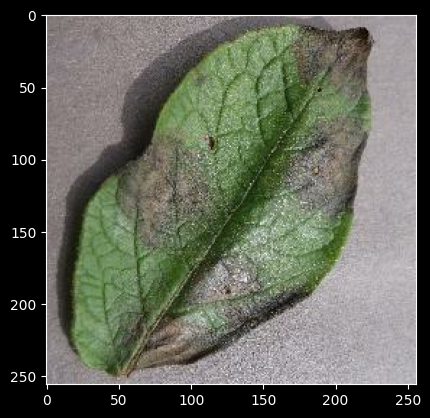

In [142]:
for image_batch, labels_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [151]:
import numpy as np
np.argmax([9.9988687e-01, 1.1307770e-04, 6.1180067e-12])

np.int64(0)

first image to predict
Actaual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted Label: Potato___Early_blight


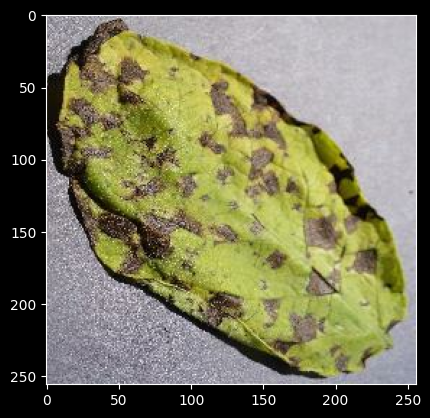

In [195]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("Actaual Label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

# our model is performing good

In [196]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
'''
    plt.imshow(img.numpy().astype("uint8"))
    plt.title(f'Actual Label: {class_names[correct_label]}')
    plt.xlabel(f'Predicted Label: {predicted_label}')
    plt.show() '''

'\n    plt.imshow(img.numpy().astype("uint8"))\n    plt.title(f\'Actual Label: {class_names[correct_label]}\')\n    plt.xlabel(f\'Predicted Label: {predicted_label}\')\n    plt.show() '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


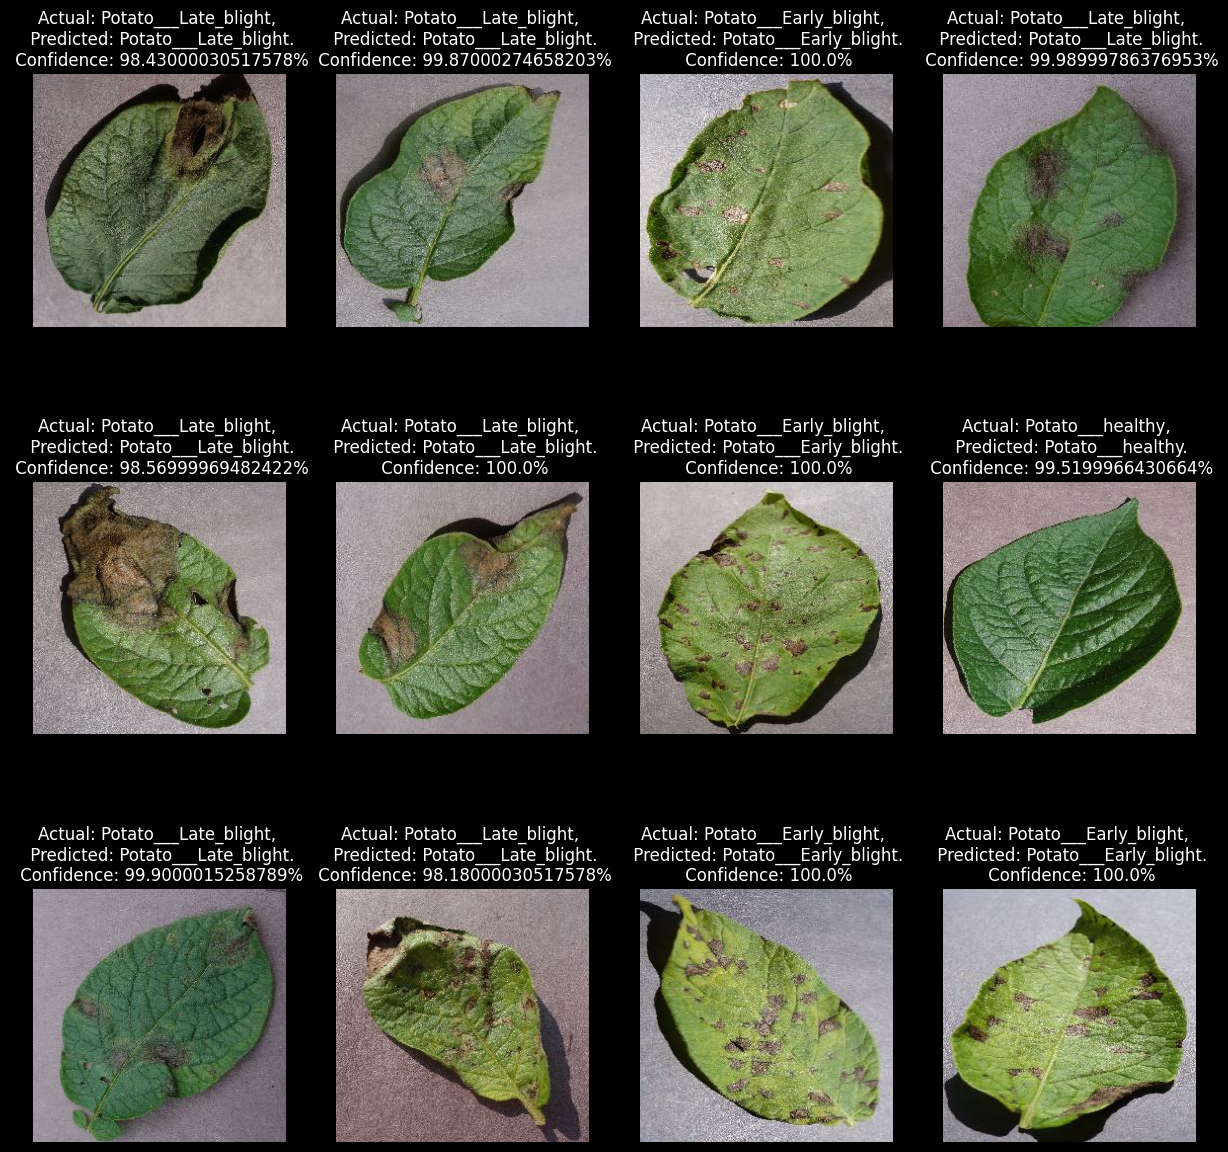

In [211]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax= plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
model.save(f"/Users/manojrammopati/Project/DATA SCIENCE ML PROJECTS/Potato Disease Classifier/Model/plant_disease_model.h5")

In [257]:
import os

def save_model_versioned(model, base_path):
    # Get the list of existing model versions
    existing_versions = [int(f.split('.')[0]) for f in os.listdir(base_path) if f.split('.')[0].isdigit()]
    # Determine the new version number
    new_version = max(existing_versions + [0]) + 1
    # Save the model with the new version number and .keras extension
    model.save(os.path.join(base_path, f"{new_version}.keras"))

# Example usage
base_path = "/Users/manojrammopati/Project/DATA SCIENCE ML PROJECTS/Potato Disease Classifier/Model"
save_model_versioned(model, base_path)